<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

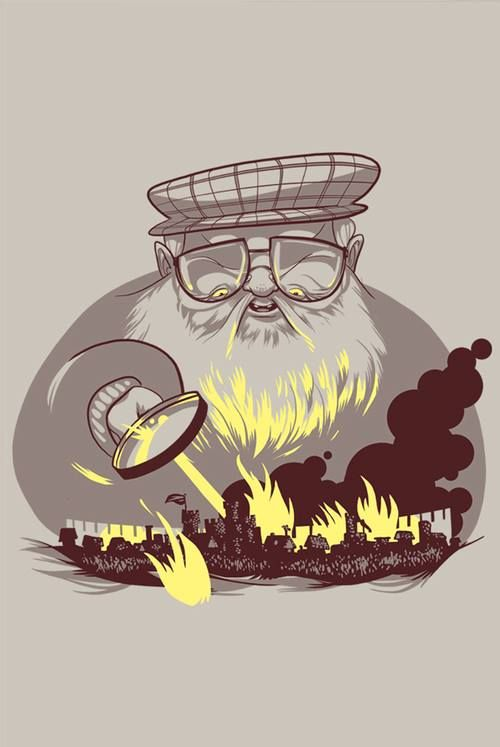

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [664]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 40.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 39.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [665]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [666]:
# гиперпараметры

POPULARITY_SCORE = 0.2
NAN_MAX = 0.85
LEN_MAX = 100
TEST_SIZE=0.2
RANDOM_STATE=42

In [667]:
data = pd.read_csv("game_of_thrones_train.csv", index_col=0)
test_data = pd.read_csv("game_of_thrones_test.csv", index_col=0)

In [668]:
useless_col = []

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [669]:
for col in data.columns:
  arr_unique = data[col].unique()
  arr = data[col]
  nan_relation = pd.isna(arr).sum() / len(arr)
  numerical = pd.api.types.is_numeric_dtype(data[col])
  print(f"{col}:  NaN: {int(nan_relation * 100)}%;  len: {len(arr_unique)};  numerical: {numerical};")
  # удаляем колоки, где NaN > 85% или если колонка не является числом и состоит из более чем 100 уникальных элементов (OneHot-encoding неоптимален)
  if (nan_relation > NAN_MAX or (not numerical and len(arr_unique) > LEN_MAX)):
    useless_col.append(col)
  elif (nan_relation):
    if (numerical):
      # колонки с числовыми значениями заполняем средним
      data.fillna({col: data[col].mean(skipna=True)}, inplace=True)
      test_data.fillna({col: data[col].mean(skipna=True)}, inplace=True)
    else:
      # иначе, заполним самым распространённым значением
      data.fillna({col: data[col].mode()[0]}, inplace=True)
      test_data.fillna({col: data[col].mode()[0]}, inplace=True)

name:  NaN: 0%;  len: 1557;  numerical: False;
title:  NaN: 53%;  len: 196;  numerical: False;
male:  NaN: 0%;  len: 2;  numerical: True;
culture:  NaN: 68%;  len: 52;  numerical: False;
dateOfBirth:  NaN: 82%;  len: 106;  numerical: True;
mother:  NaN: 98%;  len: 17;  numerical: False;
father:  NaN: 98%;  len: 20;  numerical: False;
heir:  NaN: 98%;  len: 21;  numerical: False;
house:  NaN: 24%;  len: 316;  numerical: False;
spouse:  NaN: 87%;  len: 187;  numerical: False;
book1:  NaN: 0%;  len: 2;  numerical: True;
book2:  NaN: 0%;  len: 2;  numerical: True;
book3:  NaN: 0%;  len: 2;  numerical: True;
book4:  NaN: 0%;  len: 2;  numerical: True;
book5:  NaN: 0%;  len: 2;  numerical: True;
isAliveMother:  NaN: 98%;  len: 3;  numerical: True;
isAliveFather:  NaN: 98%;  len: 3;  numerical: True;
isAliveHeir:  NaN: 98%;  len: 3;  numerical: True;
isAliveSpouse:  NaN: 87%;  len: 3;  numerical: True;
isMarried:  NaN: 0%;  len: 2;  numerical: True;
isNoble:  NaN: 0%;  len: 2;  numerical: Tru

In [670]:
useless_col

['name',
 'title',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse']

In [671]:
data.drop(useless_col, inplace=True, axis=1)
test_data.drop(useless_col, inplace=True, axis=1)

In [672]:
data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,1,Northmen,247.551971,0,0,0,0,0,0,0,35.290323,11,0.605351,0
2,1,Rivermen,208.000000,1,1,1,1,1,1,1,97.000000,1,0.896321,1
3,1,Northmen,247.551971,0,0,0,1,0,0,1,35.290323,0,0.267559,1
4,0,Northmen,82.000000,0,0,0,0,0,1,1,23.000000,0,0.183946,0
5,0,Dornish,276.000000,0,0,0,1,0,1,1,29.000000,0,0.043478,1


In [673]:
test_data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,
1558,0,Northmen,156.000000,0,0,0,0,1,0,0,100.000000,0,0.050167
1559,0,Asshai,247.551971,0,1,1,1,1,0,0,35.290323,0,0.745819
1560,0,Northmen,247.551971,0,0,1,1,0,0,0,35.290323,0,0.010033
1561,1,Northmen,247.551971,1,1,1,1,1,0,1,35.290323,0,0.220736
1562,1,Riverlands,262.000000,1,1,1,1,1,1,0,38.000000,0,0.434783


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


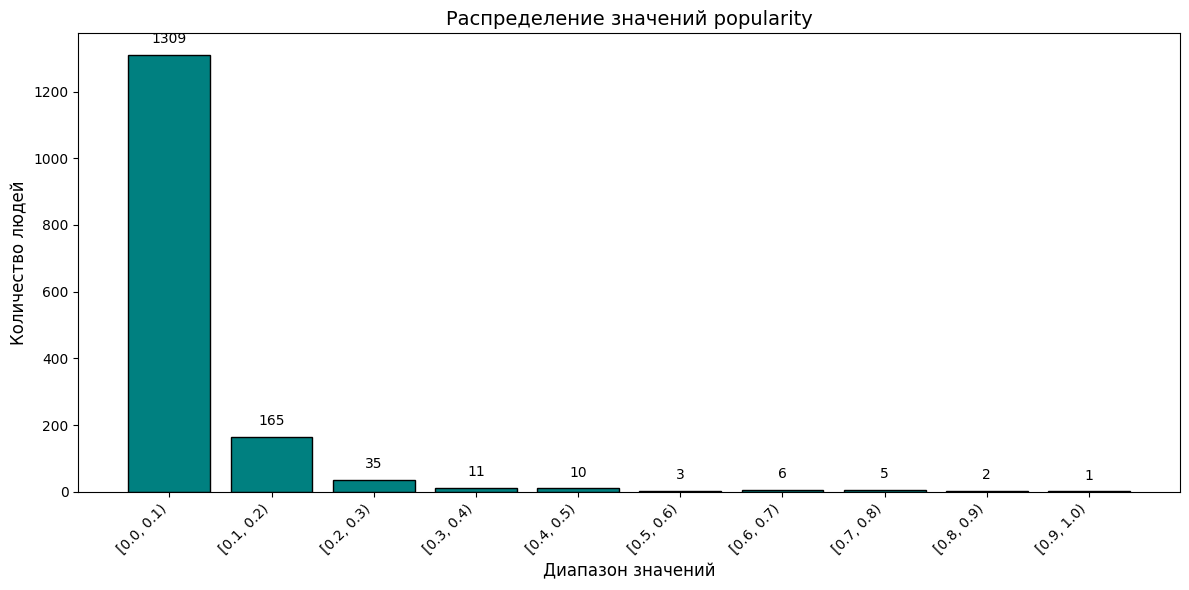

In [674]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0.1 * i for i in range(0, 11)]

popular_counts = pd.cut(data['popularity'],
                        bins=bins,
                        right=False,
                        include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(popular_counts.index.astype(str),
               popular_counts.values,
               color='teal',
               edgecolor='black')

plt.title('Распределение значений popularity', fontsize=14)
plt.xlabel('Диапазон значений', fontsize=12)
plt.ylabel('Количество людей', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,
             height + 0.02*max(popular_counts),
             f'{height}',
             ha='center',
             va='bottom')

plt.tight_layout()
plt.show()

In [675]:
# График выше показывает сильное уменьшение на ~0.2, пусть оно и станет пороговым для параметра isPopular

In [676]:
data['isPopular'] = (data['popularity'] >= POPULARITY_SCORE).astype(int)
test_data['isPopular'] = (test_data['popularity'] >= POPULARITY_SCORE).astype(int)

In [677]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
test_data['boolDeadRelations'] = (test_data['numDeadRelations'] > 0).astype(int)

In [678]:
# True - если дата рождения + возраст = 305 (по условию нынешний год)
# False - иначе, т.к. возраст и дата рождения не совпадают
# Несмотря на то, что age и dateOfBirth состоят более чем на 80% из NaN - всё равно сильно влияет на Accuracy; ~70% -> ~80%
data['bool305'] = (data['age'] + data['dateOfBirth'] >= 305).astype(int)
test_data['bool305'] = (test_data['age'] + test_data['dateOfBirth'] >= 305).astype(int)

In [679]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [680]:
def simplify_culture(culture):
    for key, values in cult.items():
        if isinstance(culture, str):
            if any(val in culture.lower() for val in values):
                return key
    return culture

data['culture'] = data['culture'].apply(simplify_culture)
test_data['culture'] = test_data['culture'].apply(simplify_culture)

In [681]:
data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,bool305
S.No,,,,,,,,,,,,,,,,,
1,1,Northmen,247.551971,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1,0
2,1,Rivermen,208.000000,1,1,1,1,1,1,1,97.000000,1,0.896321,1,1,1,1
3,1,Northmen,247.551971,0,0,0,1,0,0,1,35.290323,0,0.267559,1,1,0,0
4,0,Northmen,82.000000,0,0,0,0,0,1,1,23.000000,0,0.183946,0,0,0,0
5,0,Dornish,276.000000,0,0,0,1,0,1,1,29.000000,0,0.043478,1,0,0,1


In [682]:
test_data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations,bool305
S.No,,,,,,,,,,,,,,,,
1558,0,Northmen,156.000000,0,0,0,0,1,0,0,100.000000,0,0.050167,0,0,0
1559,0,Asshai,247.551971,0,1,1,1,1,0,0,35.290323,0,0.745819,1,0,0
1560,0,Northmen,247.551971,0,0,1,1,0,0,0,35.290323,0,0.010033,0,0,0
1561,1,Northmen,247.551971,1,1,1,1,1,0,1,35.290323,0,0.220736,1,0,0
1562,1,Riverlands,262.000000,1,1,1,1,1,1,0,38.000000,0,0.434783,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

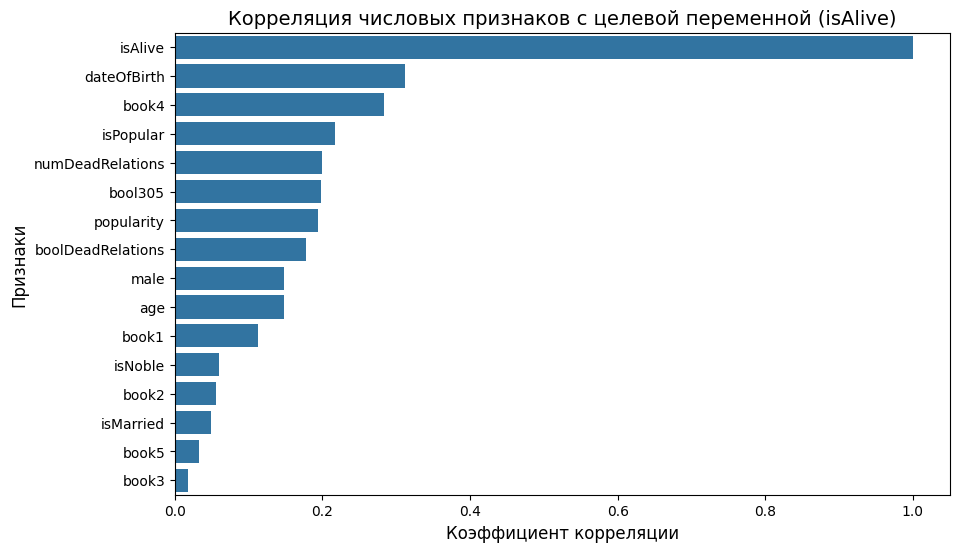

In [683]:
target_column = 'isAlive'

numeric_columns = data.select_dtypes(include=['number'])

correlation_with_target = numeric_columns.corrwith(numeric_columns[target_column]).abs()

correlation_with_target = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title(f"Корреляция числовых признаков с целевой переменной ({target_column})", fontsize=14)
plt.xlabel("Коэффициент корреляции", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.show()

In [684]:
# data.drop(columns=[...], inplace = True) - большая часть удаления и чистки произошла в пункте 1.2

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.


Доли классов:
isAlive
1    77.842004
0    22.157996
Name: count, dtype: float64


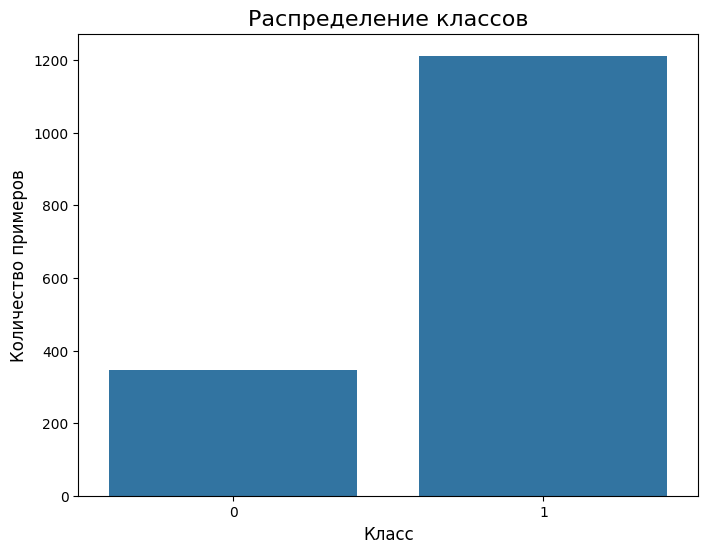

In [685]:
# isAlive - категориальный признак, равен либо 0, либо 1
class_distribution = data['isAlive'].value_counts()
class_proportions = class_distribution / len(data) * 100
print("\nДоли классов:")
print(class_proportions)

plt.figure(figsize=(8, 6))
sns.countplot(x='isAlive', data=data, legend=False)
plt.title('Распределение классов', fontsize=16)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество примеров', fontsize=12)
plt.show()

In [686]:
# OverSampling ---> 0.7223650385604113 при сохранении остальных параметров
# UnderSampling ---> 0.7223650385604113 (совпадает?) при сохранении остальных параметров
# Ничего не применять ---> 0.8046272493573264, значит не будем ничего делать с несбаланированностью данных

In [687]:
#from sklearn.utils import resample

#class_0 = data[data['isAlive'] == 0]
#class_1 = data[data['isAlive'] == 1]

#class_0_oversampled = resample(
#    class_0,
#    replace=True,
#    n_samples=len(class_1),
#    random_state=42
#)

#class_1_undersampled = resample(
#    class_1,
#    replace=False,
#    n_samples=len(class_0),
#    random_state=42
#)

#data = pd.concat([class_1_undersampled, class_0], axis=0)
#data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [688]:
data

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,bool305
S.No,,,,,,,,,,,,,,,,,
1,1,Northmen,247.551971,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1,0
2,1,Rivermen,208.000000,1,1,1,1,1,1,1,97.000000,1,0.896321,1,1,1,1
3,1,Northmen,247.551971,0,0,0,1,0,0,1,35.290323,0,0.267559,1,1,0,0
4,0,Northmen,82.000000,0,0,0,0,0,1,1,23.000000,0,0.183946,0,0,0,0
5,0,Dornish,276.000000,0,0,0,1,0,1,1,29.000000,0,0.043478,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,Northmen,247.551971,1,0,1,1,0,0,1,35.290323,0,0.160535,1,0,0,0
1554,0,Northmen,247.551971,1,1,0,0,0,0,0,35.290323,0,0.040134,0,0,0,0
1555,1,Northmen,247.551971,0,1,1,1,1,0,0,35.290323,0,0.076923,0,0,0,0


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [689]:
data_onehot = pd.get_dummies(data, columns=['culture'], drop_first=False).astype(int)
test_data_onehot = pd.get_dummies(test_data, columns=['culture'], drop_first=False).astype(int)

In [690]:
# найдём различия в колонках и удалим их, чтобы train и test данные совпадали

train_unique = list(set(data_onehot.columns) - set(test_data_onehot.columns))
train_unique.remove('isAlive')
test_unique = list(set(test_data_onehot.columns) - set(data_onehot.columns))

data_onehot.drop(train_unique, inplace=True, axis=1)
test_data_onehot.drop(test_unique, inplace=True, axis=1)

#for col in test_unique:
#  data_onehot[col] = 0

#for col in train_unique:
#  test_data_onehot[col] = 0

In [691]:
print(list(set(data_onehot.columns) - set(test_data_onehot.columns)))

['isAlive']


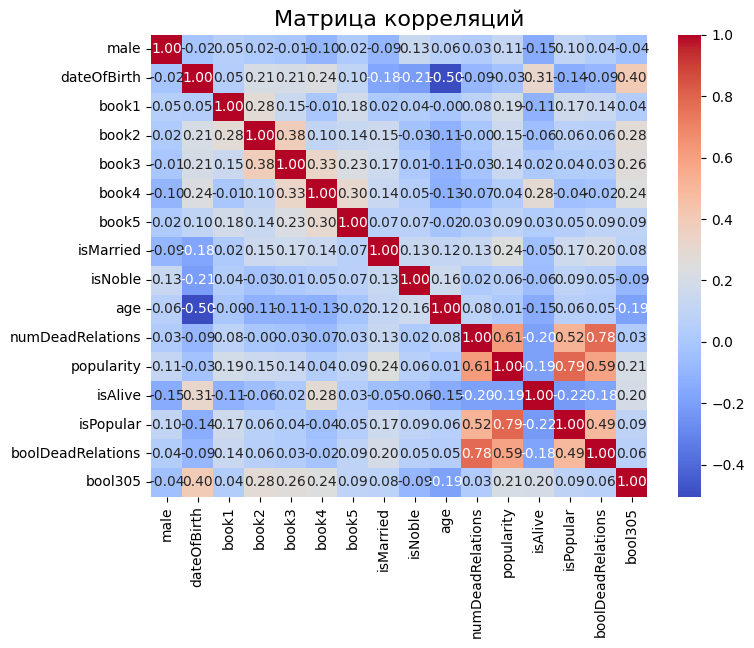

In [692]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)

plt.title("Матрица корреляций", fontsize=16)
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

<ipython-input-693-134fd2f2029b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


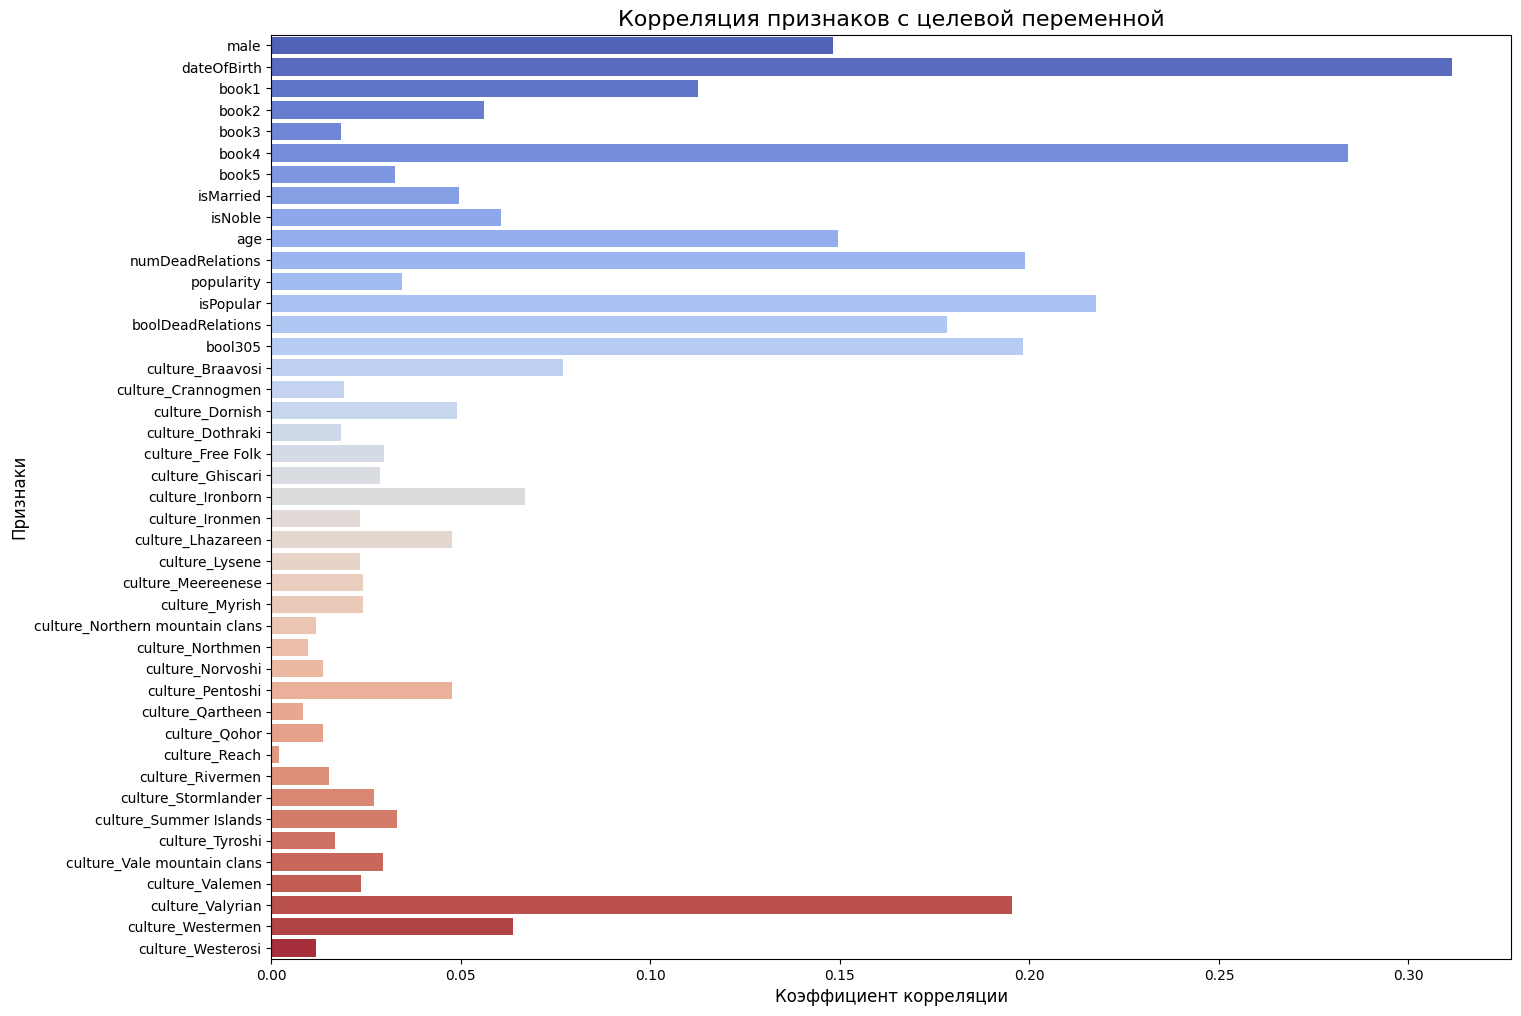

In [693]:
correlations = data_onehot.corrwith(data['isAlive']).abs()
correlations = correlations.drop('isAlive')

plt.figure(figsize=(16, 12))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Корреляция признаков с целевой переменной", fontsize=16)
plt.xlabel("Коэффициент корреляции", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [694]:
X = data_onehot.drop('isAlive', axis=1)
y = data_onehot['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [695]:
from sklearn.model_selection import train_test_split

In [696]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [697]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [698]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [699]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [700]:
models = {}
predictions = {}

#AdaBoost
models['AdaBoost'] = AdaBoostClassifier()
models['AdaBoost'].fit(X_train, y_train)
predictions['AdaBoost'] = models['AdaBoost'].predict(X_test)

#RandomForest
models['RandomForest'] = RandomForestClassifier()
models['RandomForest'].fit(X_train, y_train)
predictions['RandomForest'] = models['RandomForest'].predict(X_test)

#GaussianProcess
models['GaussianProcess'] = GaussianProcessClassifier()
models['GaussianProcess'].fit(X_train, y_train)
predictions['GaussianProcess'] = models['GaussianProcess'].predict(X_test)

#GaussianNB
models['GaussianNB'] = GaussianNB()
models['GaussianNB'].fit(X_train, y_train)
predictions['GaussianNB'] = models['GaussianNB'].predict(X_test)

#KNeighbors
models['KNeighbors'] = KNeighborsClassifier()
models['KNeighbors'].fit(X_train, y_train)
predictions['KNeighbors'] = models['KNeighbors'].predict(X_test)

#SVC
models['SVC'] = SVC()
models['SVC'].fit(X_train, y_train)
predictions['SVC'] = models['SVC'].predict(X_test)

#DecisionTree
models['DecisionTree'] = DecisionTreeClassifier()
models['DecisionTree'].fit(X_train, y_train)
predictions['DecisionTree'] = models['DecisionTree'].predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [701]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [702]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [703]:
accuracies = {}

for model_name in models:
    y_pred = predictions[model_name]
    accuracies[model_name] = accuracy_score(y_test, y_pred)

print("\nAccuracy (отсортировано):")
for model_name, accuracy in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name:20} Accuracy: {accuracy:.4f}")


Accuracy (отсортировано):
AdaBoost             Accuracy: 0.8333
GaussianProcess      Accuracy: 0.8333
RandomForest         Accuracy: 0.8301
DecisionTree         Accuracy: 0.8205
KNeighbors           Accuracy: 0.8173
SVC                  Accuracy: 0.8045
GaussianNB           Accuracy: 0.4167


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [704]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.66MB/s]


In [705]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [706]:
submission['isAlive'] = models['AdaBoost'].predict(test_data_onehot) #т.к. AdaBoost показал самый высокий результат

Как сохранить измененный Pandas DataFrame в csv файл:

In [707]:
submission.to_csv("/content/new_submission.csv", index=False)

In [ ]:
#result = 0.8046272493573264 accuracy